# Decision Trees in sklearn
In this section, you'll use decision trees to fit a given sample dataset.

Before you do that, let's go over the tools required to build this model.

For your decision tree model, you'll be using scikit-learn's Decision Tree Classifier class. This class provides the functions to define and fit the model to your data.

`from sklearn.tree import DecisionTreeClassifier`

`model = DecisionTreeClassifier()`

`model.fit(x_values, y_values)`

In the example above, the model variable is a decision tree model that has been fitted to the data x_values and y_values. Fitting the model means finding the best tree that fits the training data. Let's make two predictions using the model's predict() function.

`print(model.predict([ [0.2, 0.8], [0.5, 0.4] ]))`

> [[ 0., 1.]]

The model returned an array of predictions, one prediction for each input array. The first input, [0.2, 0.8], got a prediction of 0.. The second input, [0.5, 0.4], got a prediction of 1..

## Hyperparameters
When we define the model, we can specify the hyperparameters. In practice, the most common ones are

- max_depth: The maximum number of levels in the tree.
- min_samples_leaf: The minimum number of samples allowed in a leaf.
- min_samples_split: The minimum number of samples required to split an internal node.

For example, here we define a model where the maximum depth of the trees max_depth is 7, and the minimum number of elements in each leaf min_samples_leaf is 10.

`model = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 10)`
.

## Decision Tree Quiz**

In this quiz, you'll be given the following sample dataset, and your goal is to define a model that gives 100% accuracy on it.

The data file can be found under the "data.csv" tab in the quiz below. It includes three columns, the first 2 comprising of the coordinates of the points, and the third one of the label.

The data will be loaded for you, and split into `features X` and `labels y`.

You'll need to complete each of the following steps:


### 1. Build a decision tree model

Create a decision tree classification model using scikit-learn's `DecisionTreeClassifier` and assign it to the variable`model`.


In [2]:
# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Convert to np array immediately without making a copy (main difference with np.array)
# https://numpy.org/doc/stable/reference/generated/numpy.asarray.html
data = np.asarray(pd.read_csv("Decisition_tree_Data.csv", header=None))
X = data[:,:-1]
y = data[:,-1]
print(type(data), data.shape)
print(type(X), X.shape)
print(type(y), y.shape)

<class 'numpy.ndarray'> (96, 3)
<class 'numpy.ndarray'> (96, 2)
<class 'numpy.ndarray'> (96,)


In [11]:
# Create the decision tree model and assign it to the variable model.
# You won't need to, but if you'd like, play with hyperparameters such
# as max_depth and min_samples_leaf and see what they do to the decision
# boundary.
model = DecisionTreeClassifier()

### 2. Fit the model to the data

You won't need to specify any of the hyperparameters, since the default ones will yield a model that perfectly classifies the training data. However, we encourage you to play with hyperparameters such as max_depth and min_samples_leaf to try to find the simplest possible model.


In [12]:
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
model.feature_importances_

array([0.70574933, 0.29425067])

### 3. Predict using the model

Predict the labels for the training set, and assign this list to the variable `y_pred`.


In [13]:
# Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)

### 4. Calculate the accuracy of the model

For this, use the function sklearn function `accuracy_score`. A model's accuracy is the fraction of all data points that it correctly classified.

When you hit Test Run, you'll be able to see the boundary region of your model, which will help you tune the correct parameters, in case you need them.

**Note**: This quiz requires you to find an accuracy of 100% on the training set. This is like memorizing the training data! A model designed to have 100% accuracy on training data is unlikely to generalize well to new data. If you pick very large values for your parameters, the model will fit the training set very well, but may not generalize well. Try to find the smallest possible parameters that do the job—then the model will be more likely to generalize well. (This aspect of the exercise won't be graded.)

In [15]:
# Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 1.0


### 5. Plot the results


In [28]:
points = list(zip(X, y))  # Create tuples of points

# Use the conditional list comprehension to create two list of poitns
points1 = [(n[0]) for n in points if n[1] == 1]
points0 = [(n[0]) for n in points if n[1] == 0]
print(len(points1) + len(points0))

96


Text(0, 0.5, 'x_2')

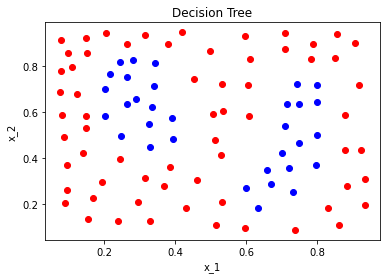

In [34]:
x,y = zip(*points1)             # Un-pack the 1st set of points
plt.scatter(x, y, color = 'red')
x,y = zip(*points0)               # Un-pack the 2nd set of points
plt.scatter(x, y, color = 'blue')
plt.title('Decision Tree')
plt.xlabel('x_1')
plt.ylabel('x_2')